In [5]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

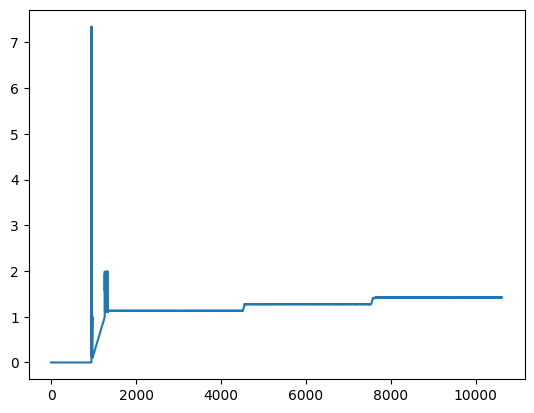

In [6]:
base_path = Path('../raw_data/2024_09_26_Hamit/Gehen/Ohne_Einschraenkung/Zebris/zebris_velocity_profile.npy')

speed_data = np.load(base_path, allow_pickle=True)

combined_speed_data = speed_data[:, 0] + (speed_data[:, 1] / (10 ** np.ceil(np.log10(speed_data[:, 1] + 1))))

plt.plot(combined_speed_data)
plt.show()

In [13]:
def find_constant_speed_segments(speeds, timestamps, min_duration=5000, tolerance=0.05):
    start_idx = 0
    segments = []

    for i in range(1, len(speeds)):
        # Prüfe, ob der aktuelle Wert außerhalb der erlaubten Toleranz liegt
        if np.abs(speeds[i] - speeds[start_idx:i+1].mean()) > tolerance:
            # Prüfe Dauer
            duration = timestamps[i - 1] - timestamps[start_idx]
            if duration >= min_duration:
                segments.append((timestamps[start_idx], timestamps[i - 1]))
            # Neuer Startpunkt
            start_idx = i

    # Prüfe letzten Abschnitt
    duration = timestamps[-1] - timestamps[start_idx]
    if duration >= min_duration:
        segments.append((timestamps[start_idx], timestamps[-1]))

    return segments

segments = find_constant_speed_segments(combined_speed_data, np.arange(len(combined_speed_data)), min_duration=1000, tolerance=0.01)
print(segments)

[(np.int64(1345), np.int64(4522)), (np.int64(4555), np.int64(7545)), (np.int64(7635), np.int64(10624))]


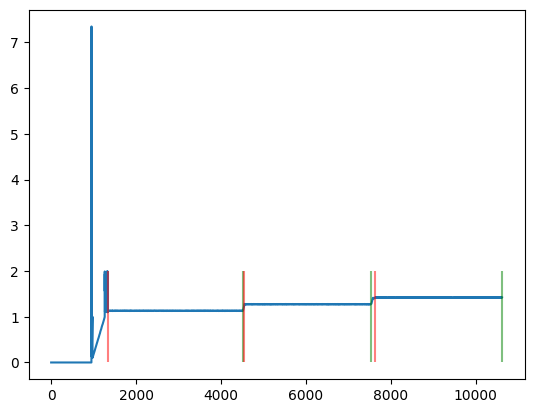

In [12]:
fig, axs = plt.subplots(1,1)
axs.plot(combined_speed_data)
for start, end in segments:
    axs.vlines(start, 0, 2, color='red', alpha=0.5)
    axs.vlines(end, 0, 2, color='green', alpha=0.5)
plt.show()